In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Sample - Superstore.xls", sheet_name="Orders")
# df.head()
df.info()
# df.describe()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [ ]:
# Create new columns
df["Shipping Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
df["Profit Ratio"] = df["Profit"] / df["Sales"]
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Time,Profit Ratio,Year,Month
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,0.1600,2020,11
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,0.3000,2020,11
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,0.4700,2020,6
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,-0.4000,2019,10
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,0.1125,2019,10


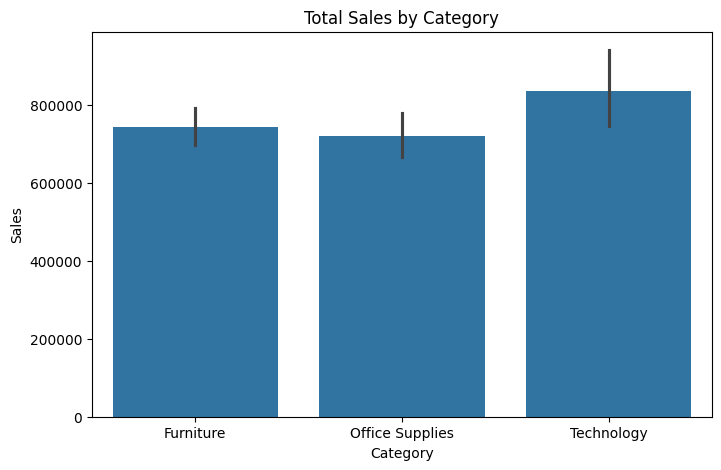

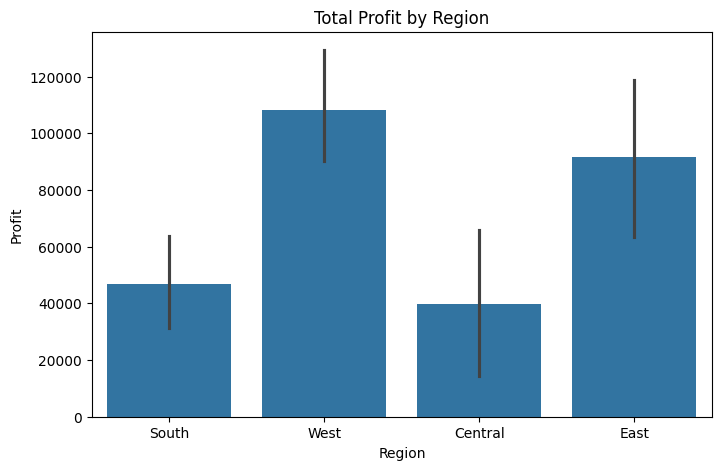

C:\Users\Eng.Fatma\AppData\Local\Temp\ipykernel_7164\4182079448.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


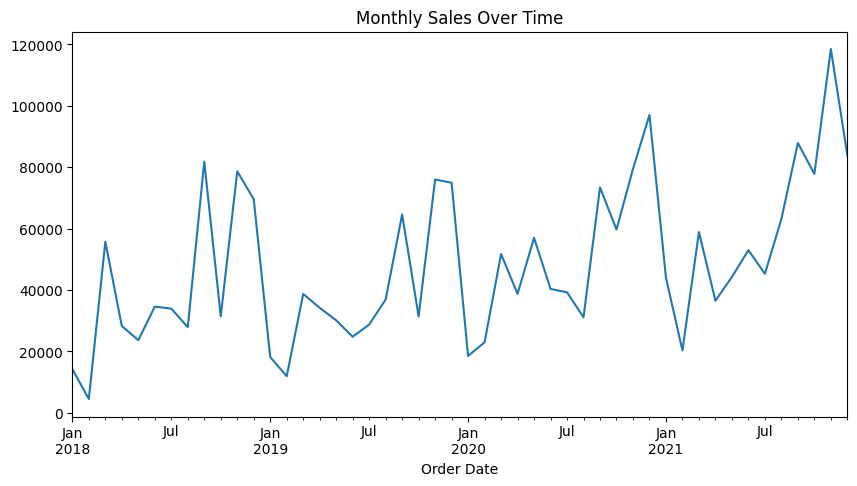

In [ ]:
# Sales by Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Category", y="Sales", estimator=sum)
plt.title("Total Sales by Category")
plt.show()

# Profit by Region
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Region", y="Profit", estimator=sum)
plt.title("Total Profit by Region")
plt.show()

# Sales trend over time
monthly_sales = df.resample("M", on="Order Date")["Sales"].sum()
monthly_sales.plot(title="Monthly Sales Over Time", figsize=(10, 5))
plt.show()

In [ ]:
df.to_csv("cleaned_superstore.csv", index=False)